<a href="https://colab.research.google.com/github/LFelipes91/MVP-Machine_Learning_-_Analytics/blob/main/MVP_Machine_Learning_%26_Analytics_Luiz_Felipe_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUC Rio - MVP Machine Learning & Analytics

Aluno: Luiz Felipe Silva Pereira

Sprint: 40530010056_20240_02

# Definição do Problema

**Qual é a descrição do problema?**

▶ *Trata-se de um problema de Classificação. A proposta é criar um modelo de aprendizado supervisionado para classificação do comportamento do usuário. Cada entrada é categorizada em uma das cinco classes de comportamento do usuário, variando de uso leve a extremo.*

**Você tem premissas ou hipóteses sobre o problema? Quais?**

▶ *Não.*

 **Que restrições ou condições foram impostas para selecionar os dados?**

▶ *Não foram impostas condições.*  

 **Descreva o seu dataset (atributos, imagens, anotações, etc).**

▶ *Originalmente este dataset consiste em 10 atributos, mais o target "User Behavior Class".*

Link do Dataset: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset?resource=download


*Seguem atributos abaixo:*

▪ *ID do usuário: Identificador exclusivo para cada usuário.*

▪ *Modelo do dispositivo: Modelo do smartphone do usuário.*

▪ *Sistema operacional: O sistema operacional do dispositivo (iOS ou Android).*

▪ *Tempo de uso do aplicativo: tempo diário gasto em aplicativos móveis, medido em minutos.*

▪ *Tempo de tela ativa: média de horas por dia em que a tela fica ativa.*

▪ *Consumo de bateria: consumo diário de bateria em mAh.*

▪ *Número de aplicativos instalados: total de aplicativos disponíveis no dispositivo.*

▪ *Uso de dados: consumo diário de dados móveis em megabytes.*

▪ *Idade: Idade do usuário.*

▪ *Gênero: Gênero do usuário (masculino ou feminino).*

▪ *Classe de comportamento do usuário: Classificação do comportamento do usuário com base em padrões de uso (1 a 5).*



Importando as biliotecas

In [31]:
#Script para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada

from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.metrics import ConfusionMatrixDisplay # importando a classe ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo

from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

# Preparação de Dados


In [32]:
# Carga do dataset

dataset = 'https://raw.githubusercontent.com/LFelipes91/MVP-Machine_Learning_-_Analytics/refs/heads/main/user_behavior_dataset.csv'

# importando dataset "user_behavior_dataset"
dadosOriginais = pd.read_csv(dataset, delimiter = ',')

# Exibindo as 10 primeiras linhas do dataset
dadosOriginais.head(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
5,6,Google Pixel 5,Android,99,2.0,940,35,564,31,Male,2
6,7,Samsung Galaxy S21,Android,350,7.3,1802,66,1054,21,Female,4
7,8,OnePlus 9,Android,543,11.4,2956,82,1702,31,Male,5
8,9,Samsung Galaxy S21,Android,340,7.7,2138,75,1053,42,Female,4
9,10,iPhone 12,iOS,424,6.6,1957,75,1301,42,Male,4


Vamos explorar o dataset, validando o tipo dos atributos e se há incidência de campos nulos.

In [33]:
#Imprimindo informações do dataset
dadosOriginais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


As possíves features são do tipo int, o pode que caracterizar a não necessidade de transformação de dados.  

In [34]:
#Verificando quantidade de nulos

dadosOriginais.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


Sem incidência de campos nulos no dataset. Aparentemente um dataset bem curado.

Agora, vamos checar mais informações do dataset para melhor entendimento dos atributos.

In [35]:
dadosOriginais.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


Separando features da target, tanto de treino quanto de teste.


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [37]:
x = dadosOriginais.drop('User Behavior Class', axis=1)
y = dadosOriginais['User Behavior Class']

Separação dos dados em treino e teste. Dividido em 70% para treino e 30% para teste

Para certificar, vamos exibir a quantidade de registros de treino e teste (X e y)

In [38]:
print("Quantidade de registros de treino: ", x_train.shape[0])

print("Quantidade de registros de teste: ", x_test.shape[0])

Quantidade de registros de treino:  490
Quantidade de registros de teste:  210


Agora vamos verificar as classes existentes na coluna 'User Behavior Class' e a quantidade de registros para cada classe.

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64


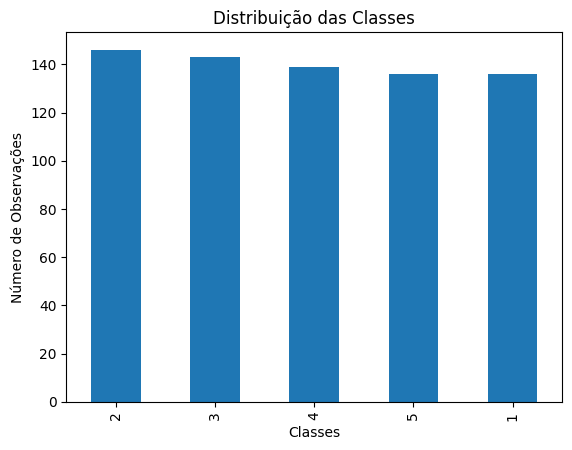

In [39]:
# Contagem das classes na coluna 'User Behavior Class'
classe = dadosOriginais['User Behavior Class'].value_counts()
print(classe)

# Plotando a distribuição das classes
dadosOriginais['User Behavior Class'].value_counts().plot(kind='bar')
plt.title('Distribuição das Classes')
plt.xlabel('Classes')
plt.ylabel('Número de Observações')
plt.show()

De acordo com a quantidade de instâncias para cada clase, podemos notar que a classe *User Behavior Class* não está tão desbalanceada.

**Seleção dos atributos**

Devido a quantidade de atributos do dataset original, iremos realizar a pré-selecão dos atributos que apresentam relevância de acordo aprendizado para este problema. Os atributos *Device Model*, *Operating System* e *Gender* serão removidos.

In [40]:
# Removendo as colunas 'Device Model', 'Operating System' e 'Gender' dos datasets x_train e x_test
x_train = x_train.drop(['Device Model', 'Operating System', 'Gender'], axis=1)
x_test = x_test.drop(['Device Model', 'Operating System', 'Gender'], axis=1)

print(x_train.columns)
print(x_test.columns)

Index(['User ID', 'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age'],
      dtype='object')
Index(['User ID', 'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age'],
      dtype='object')


Após remoções de algumas features, vamos checar a correlação das features restantes com a classe para melhor aprendizado do modelo.

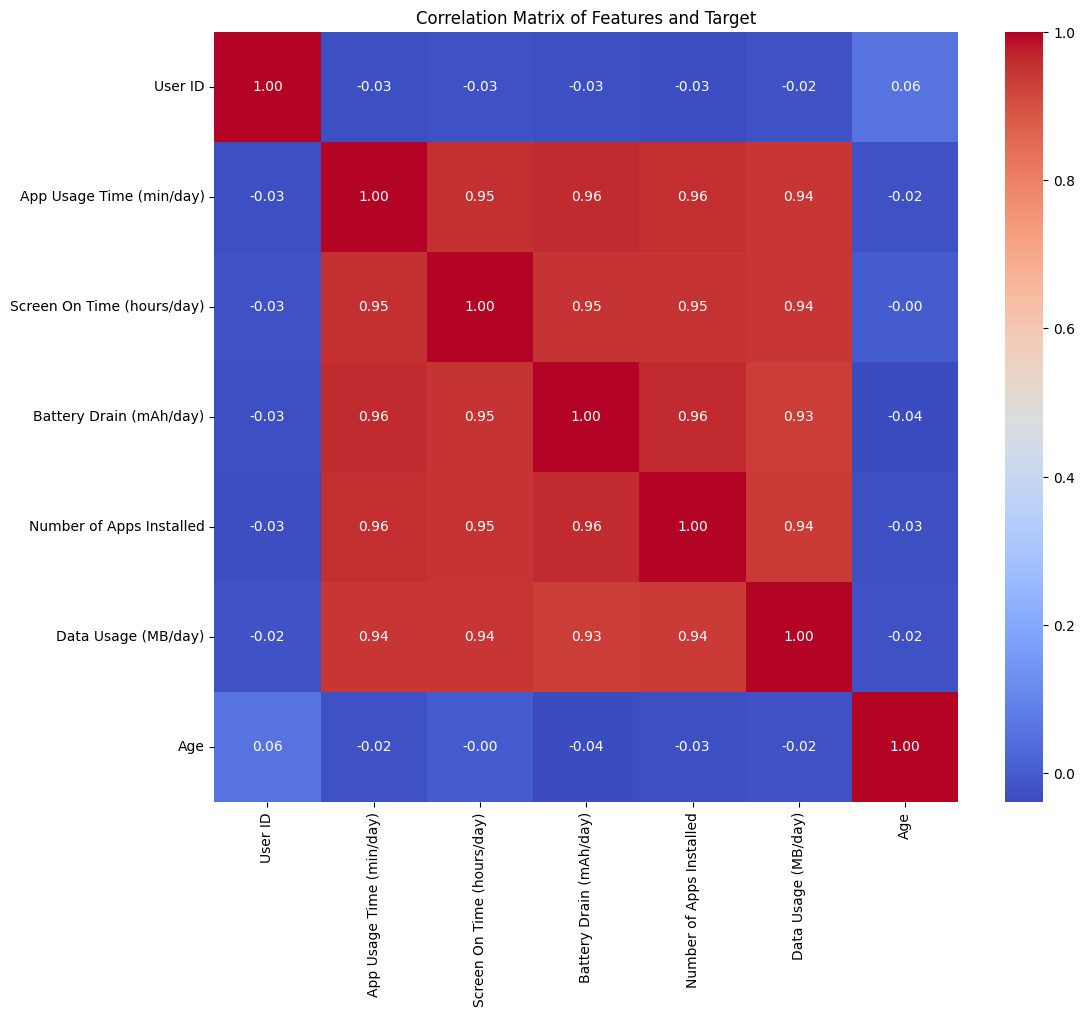

In [41]:
# prompt: grafico de correlação entre as features e target

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = x_train.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Target')
plt.show()

User ID                      -0.016242
App Usage Time (min/day)      0.970498
Screen On Time (hours/day)    0.964581
Battery Drain (mAh/day)       0.978587
Number of Apps Installed      0.981255
Data Usage (MB/day)           0.946734
Age                          -0.000563
User Behavior Class           1.000000
Name: User Behavior Class, dtype: float64


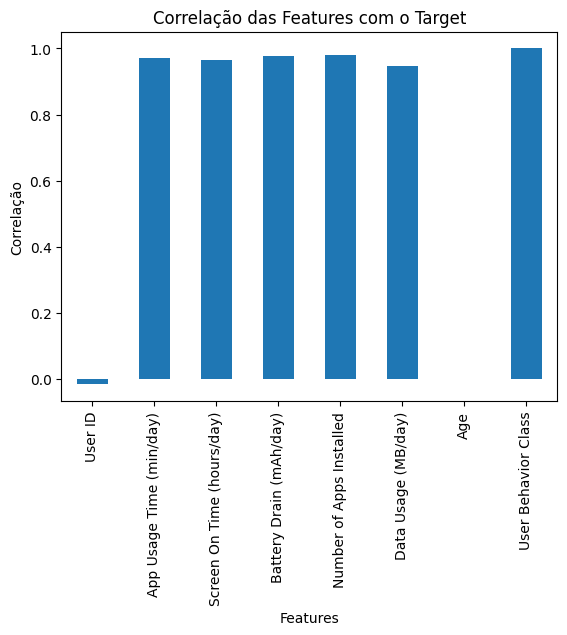

In [42]:
# Checar a correlação das features com o target
# Selecionar apenas as colunas numéricas para o cálculo da correlação
correlation = dadosOriginais.select_dtypes(include=np.number).corr()['User Behavior Class']
print(correlation)

# Plotar a correlação
correlation.plot(kind='bar')
plt.title('Correlação das Features com o Target')
plt.xlabel('Features')
plt.ylabel('Correlação')
plt.show()

# Modelagem e treinamento:

Para construção do modelo, serão utilizados os algoritmos OneVsRestClassifier,sigla OVR (estratégia mais comumente usada para classificação multiasse) e OneVsOneClassifier, sigla OVO   ( )

Objetivo: construir modelos para resolver o problema em questão.

Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas.



O modelo foi devidamente treinado? Foi observado problema de underfitting?

É possível otimizar os hiperparâmetros de algum dos modelos? Se sim, faça-o, justificando todas as escolhas.

Há algum método avançado ou mais complexo que possa ser avaliado?

Posso criar um comitê de modelos diferentes para o problema (ensembles)?

Acurácia do modelo OneVsRestClassifier com KNeighborsClassifier: 0.9952380952380953


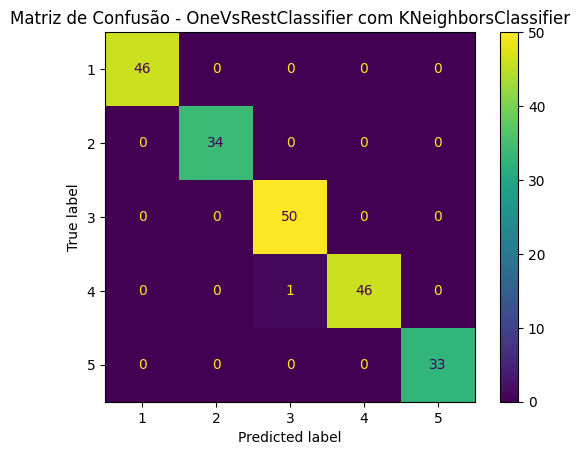

Acurácia do modelo OneVsRestClassifier com DecisionTreeClassifier: 1.0


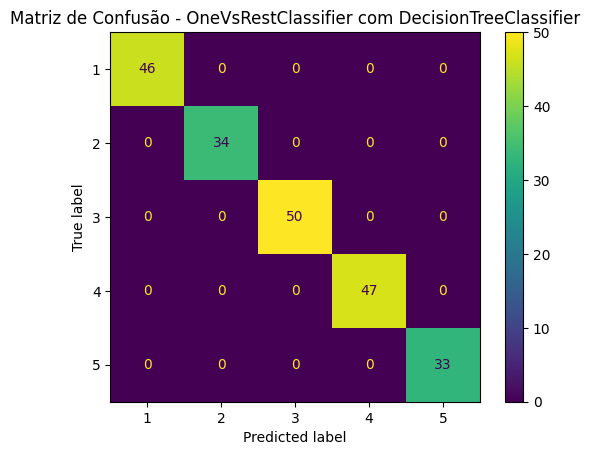

Acurácia do modelo OneVsRestClassifier com GaussianNB: 1.0


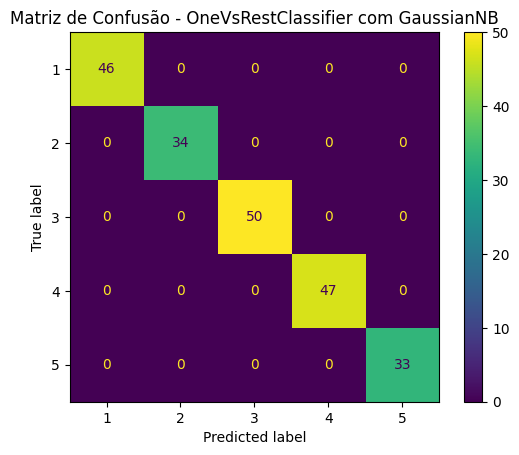

Acurácia do modelo OneVsRestClassifier com SVC: 0.9952380952380953


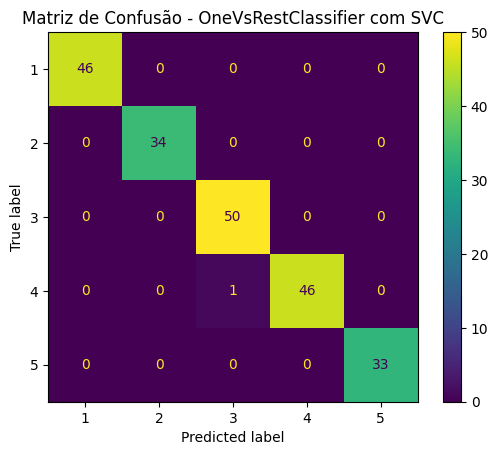

Acurácia do modelo OneVsRestClassifier com LinearSVC: 0.8047619047619048


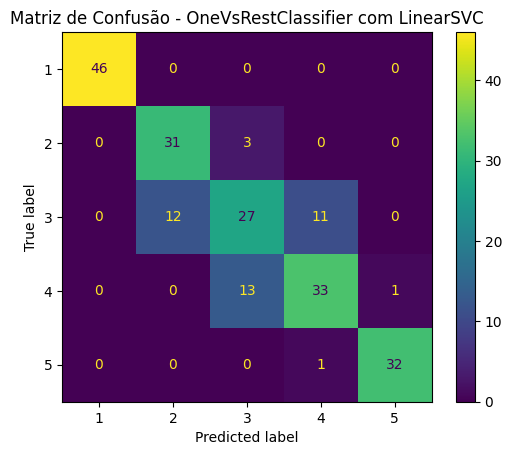

Acurácia do modelo OneVsRestClassifier com XGBClassifier: 0.9952380952380953


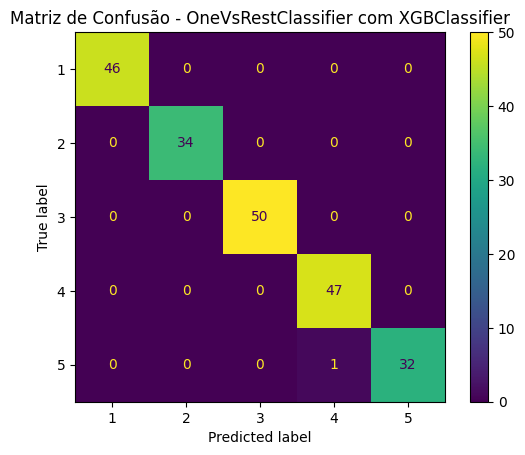

In [43]:


# Criando uma lista de estimadores
estimadores = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    SVC(),
    LinearSVC(),
    XGBClassifier()
]

# Criando uma lista para armazenar os modelos OneVsRestClassifier
modelos_ovr = []

# Criando e treinando os modelos OneVsRestClassifier com diferentes estimadores
for estimador in estimadores:
  modelo_ovr = OneVsRestClassifier(estimador)
  modelo_ovr.fit(x_train, y_train)
  modelos_ovr.append(modelo_ovr)

# Avaliando os modelos (Exemplo com acurácia)
for i, modelo in enumerate(modelos_ovr):
  y_pred = modelo.predict(x_test)
  acuracia = accuracy_score(y_test, y_pred)
  print(f"Acurácia do modelo OneVsRestClassifier com {type(estimadores[i]).__name__}: {acuracia}")

  # Exibindo a matriz de confusão (opcional)
  ConfusionMatrixDisplay.from_estimator(modelo, x_test, y_test)
  plt.title(f'Matriz de Confusão - OneVsRestClassifier com {type(estimadores[i]).__name__}')
  plt.show()

In [44]:
OVR = OneVsRestClassifier(XGBClassifier(n_estimators=100,random_state=42)).fit(x_train, y_train)

#OVO = OneVsOneClassifier(SVC())

In [45]:
print(OVR.score(x_train, y_train))
print(OVR.score(x_test, y_test))

1.0
0.9952380952380953


In [46]:
confusion_matrix = pd.crosstab(y_test, OVR.predict(x_test), rownames=['Real'], colnames=['Predito'], margins=True)
confusion_matrix

Predito,1,2,3,4,5,All
Real,,,,,,
1,46,0,0,0,0,46
2,0,34,0,0,0,34
3,0,0,50,0,0,50
4,0,0,0,47,0,47
5,0,0,0,1,32,33
All,46,34,50,48,32,210


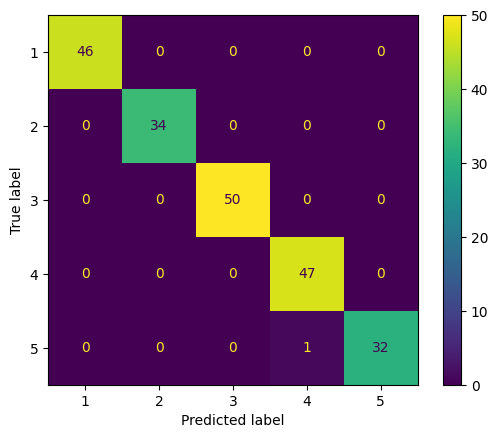

In [47]:
ConfusionMatrixDisplay.from_estimator(OVR, x_test, y_test)
plt.show()

# Avaliação de Resultados:

Objetivo: analisar o desempenho dos modelos gerados em dados não vistos (com a base de teste)

Selecione as métricas de avaliação condizentes com o problema, justificando.
Treine o modelo escolhido com toda a base de treino, e teste-o com a base de teste.
Os resultados fazem sentido?
Foi observado algum problema de overfitting?
Compare os resultados de diferentes modelos.
Descreva a melhor solução encontrada, justificando.